<a href="https://colab.research.google.com/github/vini-queiroz/python_data_science/blob/main/Aula_05_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Limpeza de Dados

In [11]:
import pandas as pd

df = pd.read_csv('/content/data.csv')

#df.dropna(inplace = True)   # O .dropna irá retirar toda e qualquer linha que não possua um valor em sua celula,  já o inplace = True ira fazer a substituição direto na tabela base

#df.fillna(130, inplace = True)   # O comando .fillna ira substituir todos as celulas que possuirem NaN

x = df["Calories"].mean()

df.fillna({"Calories": x}, inplace= True)  # No caso estamos especificando em qual coluna queremos que haja a substituição, no caso "Calories", iremos subs pela media da coluna caloria

print(df.to_string())

    Duration          Date  Pulse  Maxpulse  Calories
0         60  '2020/12/01'    110       130    409.10
1         60  '2020/12/02'    117       145    479.00
2         60  '2020/12/03'    103       135    340.00
3         45  '2020/12/04'    109       175    282.40
4         45  '2020/12/05'    117       148    406.00
5         60  '2020/12/06'    102       127    300.00
6         60  '2020/12/07'    110       136    374.00
7        450  '2020/12/08'    104       134    253.30
8         30  '2020/12/09'    109       133    195.10
9         60  '2020/12/10'     98       124    269.00
10        60  '2020/12/11'    103       147    329.30
11        60  '2020/12/12'    100       120    250.70
12        60  '2020/12/12'    100       120    250.70
13        60  '2020/12/13'    106       128    345.30
14        60  '2020/12/14'    104       132    379.30
15        60  '2020/12/15'     98       123    275.00
16        60  '2020/12/16'     98       120    215.20
17        60  '2020/12/17'  

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

df = pd.read_csv('/content/data.csv')

print(df.isnull().sum())

# Separando dados para treino.
df_treino = df[df["Calories"].notnull()]
# Separando dados para predição
df_predição = df[df["Calories"].isnull()]

# Definindo variáveis dependentes
X = df_treino[["Duration", "Pulse", "Maxpulse"]]
Y = df_treino["Calories"]

# Definindo entre treino e teste
X_treino, X_test, Y_treino, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

# Criar e treinar o modelo
model = LinearRegression()
model.fit (X_treino, Y_treino)

# 7️ Avaliar o modelo
y_pred = model.predict(X_test)

print("\n📊 Avaliação do Modelo:")
print(f"R² (coeficiente de determinação): {r2_score(Y_test, y_pred):.4f}")
print(f"MAE (erro absoluto médio): {mean_absolute_error(Y_test, y_pred):.2f}")

coef_df = pd.DataFrame({
    "Variável": ["Duration", "Pulse", "Maxpulse"],
    "Coeficiente": model.coef_
})
print("\nCoeficientes do modelo:")
print(coef_df)
print(f"Intercepto: {model.intercept_:.2f}")



Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    2
dtype: int64

📊 Avaliação do Modelo:
R² (coeficiente de determinação): -3.5394
MAE (erro absoluto médio): 48.15

Coeficientes do modelo:
   Variável  Coeficiente
0  Duration    -0.161436
1     Pulse     4.234924
2  Maxpulse     1.483243
Intercepto: -307.02


In [63]:
import pandas as pd

df = pd.read_csv('/content/data1.csv')

#df.dropna(inplace = True)   # O .dropna irá retirar toda e qualquer linha que não possua um valor em sua celula,  já o inplace = True ira fazer a substituição direto na tabela base

print(df.isnull().sum(),'\n')


print(f'Média: {df['Calories'].mean():.2f}\n',
      f'Mediana: {df['Calories'].median():.2f}\n',
      f'Moda: {df['Calories'].mode()}')

# df.fillna(130, inplace = True)   # O comando .fillna ira substituir todos as celulas que possuirem NaN

x = df["Calories"].mean()

# x = df["Calories"].median()

# x = df["Calories"].mode()

df.fillna({"Calories": x}, inplace= True)  # No caso estamos especificando em qual coluna queremos que haja a substituição, no caso "Calories", iremos subs pela media da coluna caloria

print(df.to_string())



# Linhas 17, 27, 52

Duration    0
Pulse       1
Maxpulse    0
Calories    7
dtype: int64 

Média: 377.41
 Mediana: 319.80
 Moda: 0    300.0
Name: Calories, dtype: float64
     Duration  Pulse  Maxpulse     Calories
0          60  110.0       130   409.100000
1          60  117.0       145   479.000000
2          60  103.0       135   340.000000
3          45  109.0       175   282.400000
4          45  117.0       148   406.000000
5          60  102.0       127   300.000000
6          60  110.0       136   374.000000
7          45  104.0       134   253.300000
8          30  109.0       133   195.100000
9          60   98.0       124   269.000000
10         60  103.0       147   329.300000
11         60  100.0       120   250.700000
12         60  106.0       128   345.300000
13         60  104.0       132   379.300000
14         60   98.0       123   275.000000
15         60   98.0       120   215.200000
16         60  100.0       120   300.000000
17         45   90.0       112   377.408642
18         60

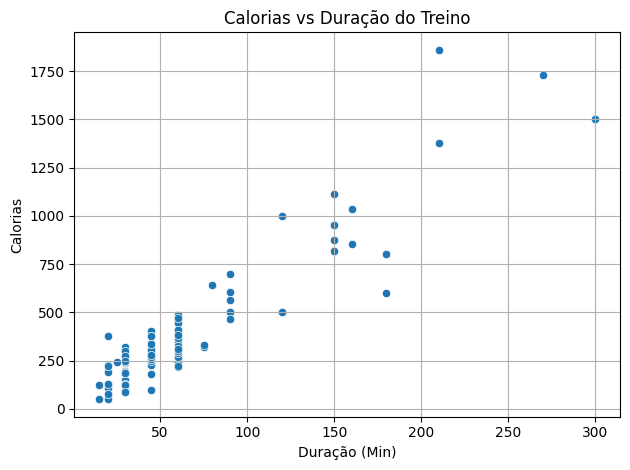

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Duration', y='Calories', data= df)
plt.title('Calorias vs Duração do Treino')
plt.xlabel('Duração (Min)')
plt.ylabel('Calorias')
plt.grid(True)
plt.tight_layout()
plt.show()

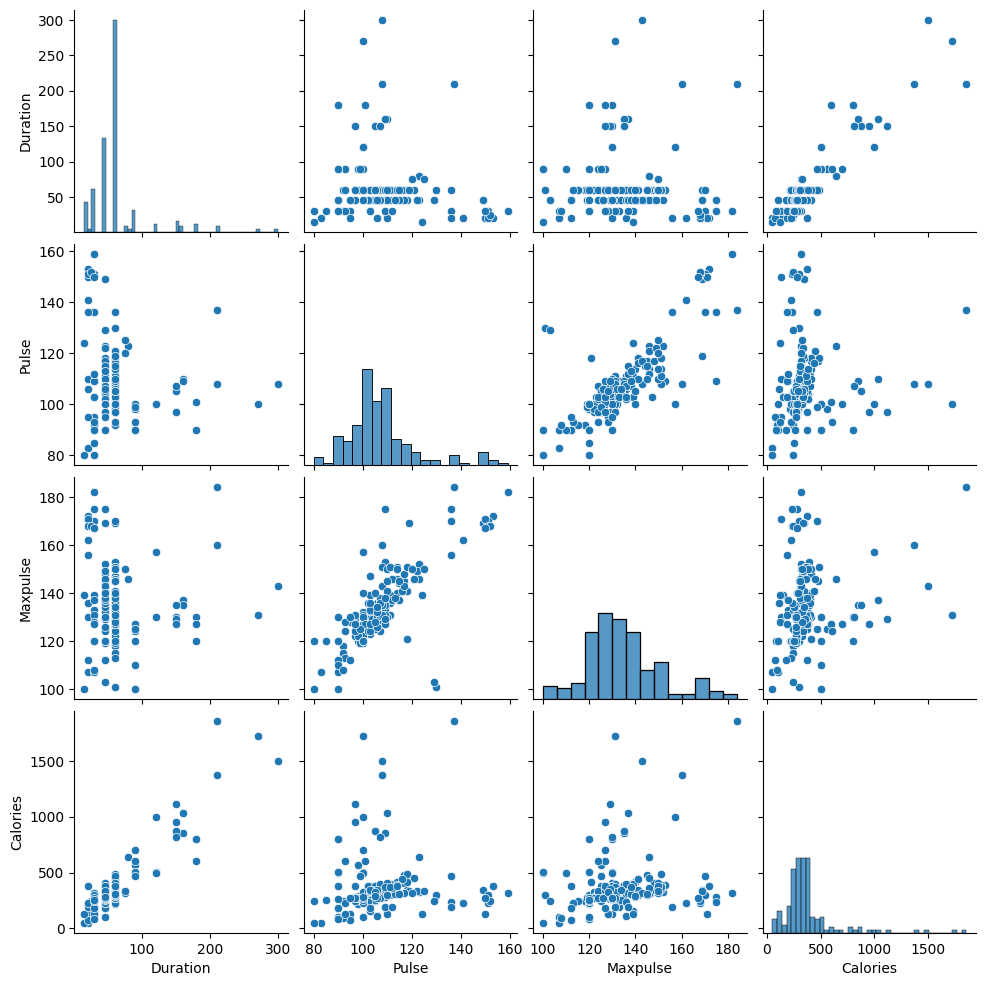

In [72]:
sns.pairplot(df)
plt.grid(True)